# Week 1 Homework for Mathematical Experiments

> 2023.09.04 Mon

## 1.1

### Question
let $f_n(x) = \sum\limits_{k=1}^n (-1)^k \dfrac {x^{2k +1}} {(2k + 1)!}$, for $n = 3, 4, \cdots, 7$ calculate zeros near $x = 3$ using newton's method, analyze zeros as n increases.

------

### Solution

**About newton's method for apporximating zeros:**

Ignoring all the maths, the following iteration formula comes out:

$$
x_n = x_{n-1} - \dfrac {f(x_{n-1})} {f^{\prime}(x_{n-1})}
$$

So let's break down the goal:
* create $f$
* create $f^{\prime}$
* create iteration

#### Step one: Declare the function:

> Notes about the following declaration:
> * Inline code is used to save space & time, jupyter magic is another workaround, see [here](https://am111.readthedocs.io/en/latest/jmatlab_use.html)
> * `sysm k` is used to prevent variable not found error, `symsum` would provide value for `k`

In [1]:
syms k
f = @(n,x) symsum((-1)^k*x.^(2*k+1)/factorial(2*k+1),k,1,n+1);

Visualization:

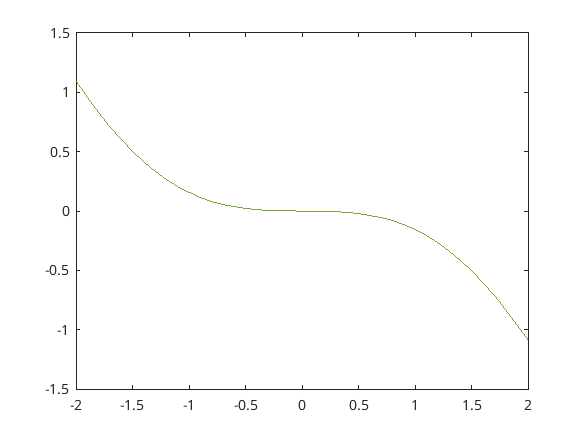

In [29]:
x = -2:0.1:2;
for n=3:7
    y = f(n,x);
    plot(x,y)
    hold on % plot multiple graph into one, otherwize only one graph would be created
end
hold off

#### Step two: Create $f^{\prime}$

In [30]:
delta = 1e-8;
steps = 10;

Error connecting to MATLAB. Check the status of MATLAB by clicking the "Open MATLAB" button. Retry after ensuring MATLAB is running successfully

In [4]:
div = @(f,x) (f(x+delta)-f(x-delta))/(2*delta);

Verfication:

In [25]:
square = @(x) x^2;
div(square, 1)
div(square, 2)
div(square, 3)

ans =           1.99999999999984

ans =           3.99999999999956

ans =           5.99999999999934

#### Step three: Create iteration

In [7]:
newton_iteration = @(f, x_n) x_n - f(x_n) / div(f,x_n);

Verification:

In [8]:
newton_iteration(square, 2)
newton_iteration(square, 1)
newton_iteration(square, 0.5)
newton_iteration(square, 0.25)

ans =           0.99999999999989

ans =          0.499999999999959

ans =          0.249999999999997

ans =                      0.125

The result is expected since $(x^2)^\prime = 2x$, so
$$
x_n = x_{n-1} - \dfrac {x_{n-1}^2} {2 x_{n-1}} = \frac 12 x_{n-1}
$$

Additionally, let determine how many steps is suitable for this paticluar f:

In [27]:
f_tmp = @(x) f(3,x);
x=vpa(3,5);
for c=1:100
    x = newton_iteration(f_tmp, x);
    disp(double(x))
end

          1.55442509011231
         0.990626928503361
         0.649224935755621
         0.429729856637028
         0.285599212657404
         0.190140257600866
         0.126684269234998
        0.0844344477047127
        0.0562842540754711
        0.0375228261739021
        0.0250175892736433
        0.0166826567583228
        0.0111283711833381
       0.00742885602521325
       0.00496743271122437
       0.00333369001856485
       0.00225481866428586
       0.00154945745897499
       0.00109593876681359
      0.000809985662462534
      0.000630952099660607
      0.000516481782173884
      0.000439952126085667
      0.000386078761983087
      0.000346313111481847
      0.000315768659438388
      0.000291533010971085
      0.000271789319890369
      0.000255354489951727
      0.000241428112175735
      0.000229450328512913
      0.000219018050848611
      0.000209833685635843
      0.000201672664601695
      0.000194362246027426
      0.000187767291234802
      0.000181780485350266
 

Final loop:

In [9]:
%formats
format long g
format compact

In [14]:
for n=3:7
    f_tmp = @(x) f(n,x);
    x=vpa(3,5);
    for c=1:steps
        x = newton_iteration(f_tmp, x);
    end
    disp(n)
    disp(double(x))
end

     3
        0.0375228261739021
     4
        0.0377183435392291
     5
        0.0377046766045707
     6
        0.0377053698661172
     7
        0.0377053433777492


As discovered, as n increases, calculated $x_0$ tend to be stable.